In [1]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Define paths to the dataset
train_folder = r"C:\Users\Harshita Mehta\dogs-vs-cats\train\train1"
test_folder = r"C:\Users\Harshita Mehta\dogs-vs-cats\test1\test"

In [3]:
# Parameters
image_size = (300,300)  # Resize images to 32x32 pixels to reduce memory usage

def load_images_from_folder(folder, is_test=False):
    images = []
    labels = []
    print(f"Loading images from {folder}...")
    for filename in os.listdir(folder):
        print(f"Processing file: {filename}")
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, image_size)
            img = img.flatten().astype('float32')
            images.append(img)
            # For test data, labels might be empty if not available
            if not is_test:
                if 'cat' in filename.lower():
                    labels.append(0)
                elif 'dog' in filename.lower():
                    labels.append(1)
    print(f"Loaded {len(images)} images from {folder}")
    return images, labels

# Load and preprocess images
train_images, train_labels = load_images_from_folder(train_folder)
test_images, _ = load_images_from_folder(test_folder, is_test=True)

Loading images from C:\Users\Harshita Mehta\dogs-vs-cats\train\train1...
Processing file: cat.0.jpg
Processing file: cat.1.jpg
Processing file: cat.10.jpg
Processing file: cat.11.jpg
Processing file: cat.112.jpg
Processing file: cat.113.jpg
Processing file: cat.114.jpg
Processing file: cat.115.jpg
Processing file: cat.116.jpg
Processing file: cat.117.jpg
Processing file: cat.118.jpg
Processing file: cat.119.jpg
Processing file: cat.12.jpg
Processing file: cat.120.jpg
Processing file: cat.121.jpg
Processing file: cat.122.jpg
Processing file: cat.123.jpg
Processing file: cat.124.jpg
Processing file: cat.125.jpg
Processing file: cat.126.jpg
Processing file: cat.127.jpg
Processing file: cat.128.jpg
Processing file: cat.129.jpg
Processing file: cat.13.jpg
Processing file: cat.130.jpg
Processing file: cat.131.jpg
Processing file: cat.132.jpg
Processing file: cat.133.jpg
Processing file: cat.134.jpg
Processing file: cat.135.jpg
Processing file: cat.136.jpg
Processing file: cat.137.jpg
Process

In [4]:
# Check if any images were loaded
if len(train_images) == 0:
    raise ValueError("No training images loaded. Please check the dataset path.")
if len(test_images) == 0:
    raise ValueError("No test images loaded. Please check the dataset path.")

# Convert to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (368, 270000)
Test data shape: (208, 270000)


In [5]:
# Ensure consistent number of samples
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Mismatch between number of training images and labels.")

# Initialize and train the SVM model
print("Training SVM model...")
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("Model training complete.")

# Predict on the test set
print("Making predictions...")
y_pred = model.predict(X_test)

# For this case, we don't have ground truth labels for test images
# In practice, you would save predictions or evaluate them if true labels are available
print("Predictions made. Number of predictions:", len(y_pred))



Training SVM model...
Model training complete.
Making predictions...
Predictions made. Number of predictions: 208


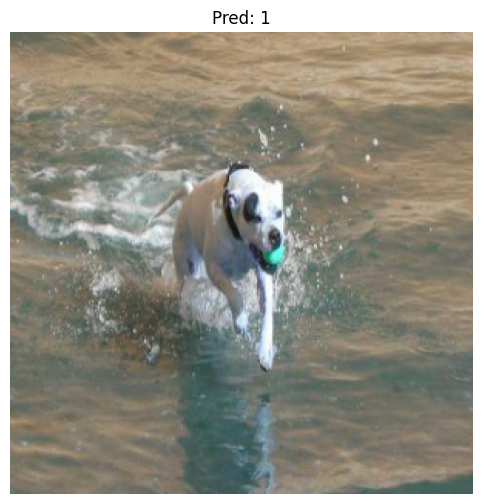

In [6]:
# Optional: Visualize some predictions if you have ground truth for test set

def visualize_predictions(X, y_pred, n_images=100):
    plt.figure(figsize=(12, 6))
    for i in range(n_images):
        img = X[i].reshape(image_size[0], image_size[1], 3)
        plt.imshow(img.astype('uint8'))
        plt.title(f"Pred: {y_pred[i]}")
        plt.axis('off')
    plt.show()
# Uncomment if ground truth is available
visualize_predictions(X_test, y_pred, n_images=93)

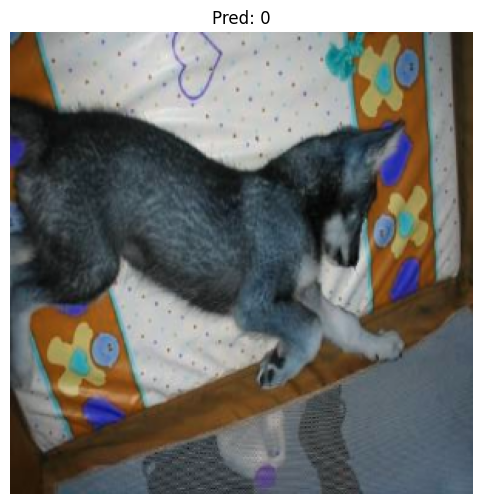

In [7]:
visualize_predictions(X_test, y_pred, n_images=39)

<Figure size 1200x600 with 0 Axes>

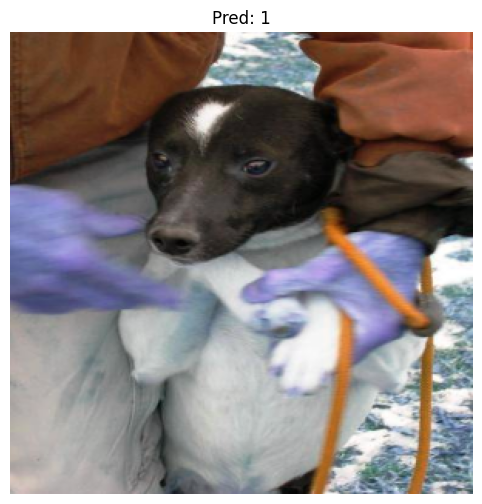

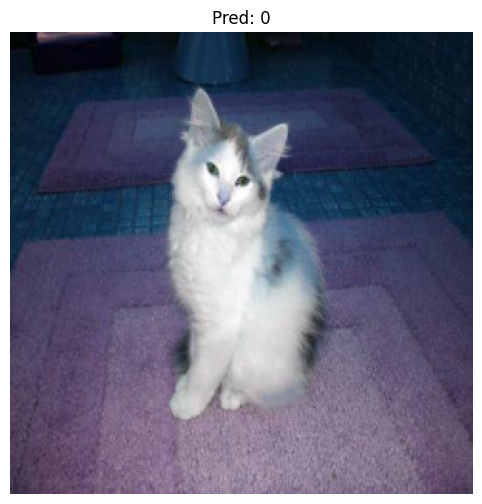

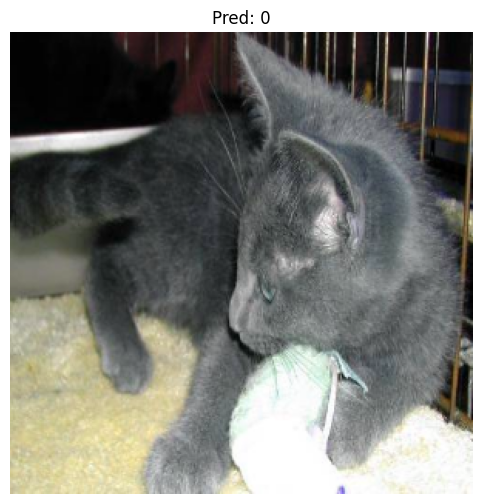

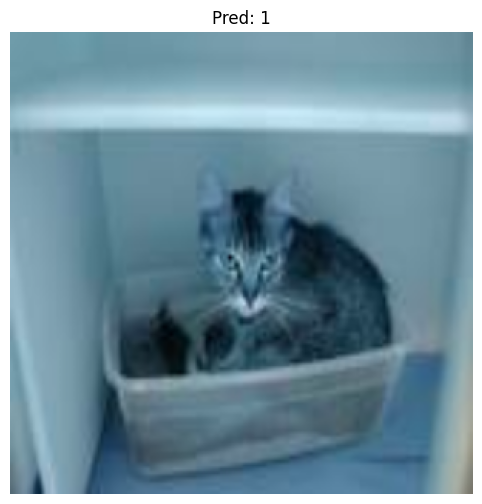

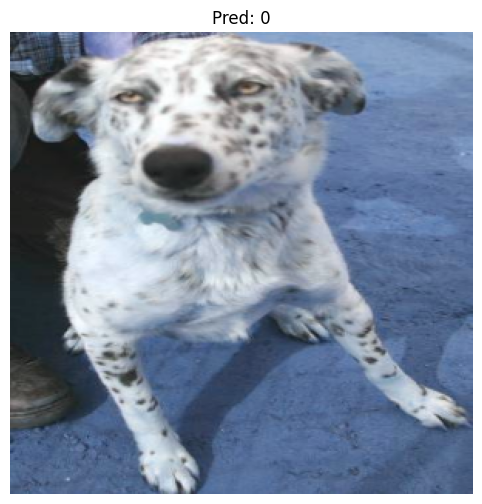

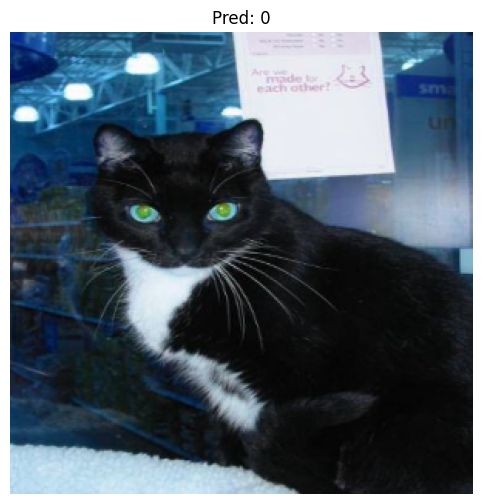

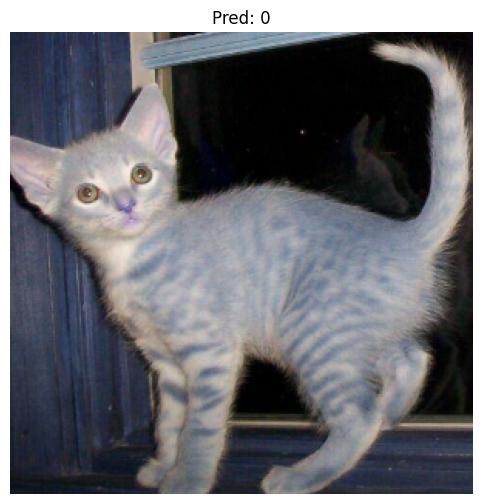

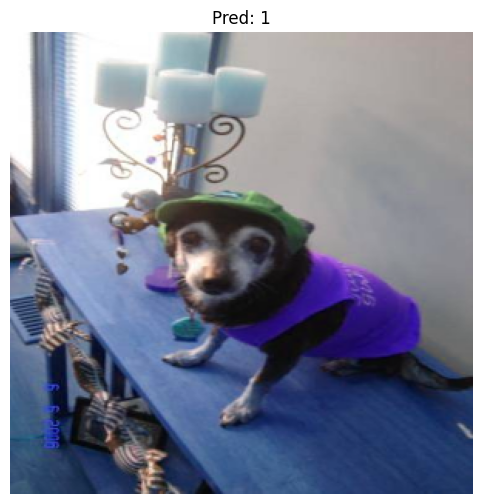

In [8]:
for n_images in range(0,9):
    visualize_predictions(X_test, y_pred,n_images)